# Text Mining with Python: Homework 5

In [28]:
import nltk
from nltk.book import *
from nltk.corpus import gutenberg
from nltk import word_tokenize
from nltk.corpus import gutenberg
import re
from urllib import request
import random
from nltk.corpus import wordnet as wn
from operator import itemgetter





# Questions
==================================================================================================================


### Question 1 (5-15)

◑ Write programs to process the Brown Corpus and find answers to the following questions:
- Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s suffix.)
- Which word has the greatest number of distinct tags. What are they, and what do they represent?
- List tags in order of decreasing frequency. What do the 20 most frequent tags represent?
- Which tags are nouns most commonly found after? What do these tags represent?

In [29]:
#part a
freq = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words())
for i in freq.conditions():
    if freq[i]['NNS'] >freq[i]['NN']:
        print(i)

# irregularities
# presentments
# thanks
# reports
# voters
# laws
# legislators...
        
#part b
cond1 = freq.conditions()
tags1 = []

for c in cond1:
    tags1.append((c, len(freq[c])))
tags1 = list(reversed(sorted(tags1, key=lambda x: x[1])))
print(tags1[0])
[print(a) for a in freq[tags1[0][0]]]

# ('that', 12)

#From this, we observe these twelve tags:
# CS: Subordinators
# CS-HL: Subordinators-occurring in headline
# CS-NC: Subordinators-cited word
# DT: Deictic Determiner
# DT-NC: Deictic Determiner- cited word
# NIL: No tag
# QL: Qualifier
# WPO: objective 'wh' pronoun
# WPO-NC: objective 'wh' pronoun- cited word
# WPS: nominative 'wh' pronoun plural
# WPS-HL: nominative wh- pronoun - occuring in headline
# WPS-NC: nominative wh- pronoun - cited word

#part c
freq1 = FreqDist([b for a, b in nltk.corpus.brown.tagged_words()])
common_tags = freq1.most_common(20)
# [('NN', 152470), #singular or mass noun
# ('IN', 120557), #preposition
# ('AT', 97959), #article
# ('JJ', 64028), #adjective
# ('.', 60638), #sentence closer
# (',', 58156), #comma
# ('NNS', 55110), #plural noun
# ('CC', 37718), #coordinating conjunction
# ('RB', 36464), #adverb
# ('NP', 34476), #proper noun or part of name phrase
# ('VB', 33693), #verb, base form
# ('VBN', 29186), #verb, past participle
# ('VBD', 26167), #verb, past tense
# ('CS', 22143), #subordinating conjunction
# ('PPS', 18253), #3rd. singular nominative pronoun
# ('VBG', 17893), #verb, present participle/gerund	
# ('PP$', 16872), #possessive personal pronoun
# ('TO', 14918), #infinitive marker to
# ('PPSS', 13802), #other nominative personal pronoun
# ('CD', 13510)] #cardinal numeral

#part d
bis = nltk.bigrams(nltk.corpus.brown.tagged_words())
first = [a[1] for (a, b) in bis if b[1] == 'NN']
freq2 = nltk.FreqDist(first)
[print(a) for (a,b) in freq2.most_common()[0:9]]
# AT: article
# JJ: adjective
# IN: preposition
# NN: singular or mass noun
# PP$: possesive personal pronoun
# DT: singular determiner
# CC: coordinating conjunction
# VBG: verb, present participle/gerund
# AP: post-determiner



irregularities
presentments
thanks
reports
voters
laws
legislators
topics
departments
practices
governments
offices
personnel
policies
steps
funds
services
homes
items
counties
jurors
taxpayers
appraisers
guardians
administrators
fees
procedures
recommendations
juries
citizens
actions
wards
costs
servants
criticisms
influences
concessionaires
prices
deputies
matters
officials
employes
Police
farms
Attorneys
responses
petitions
precincts
signatures
dissents
says
courses
names
candidates
relations
years
starts
areas
adjustments
chambers
$100
bonds
$30
courts
sales
contracts
highways
$3
$4
ones
authorities
$50
roads
plans
$10
allowances
details
raises
sessions
members
congressmen
votes
polls
calls
threats
days
protests
bankers
rules
questions
witnesses
dollars
means
books
permits
accounts
stocks
persons
banks
firms
companies
corporations
Bankers
obligations
depositors
customers
millions
pockets
Senators
schools
students
children
$451,500
savings
$157,460
$88,000
scholastics
parimutuels
fo

[None, None, None, None, None, None, None, None, None]


### Question 2 (5-18)
◑ Generate some statistics for tagged data to answer the following questions:
- What proportion of word types are always assigned the same part-of-speech tag?
- How many words are ambiguous, in the sense that they appear with at least two tags?
- What percentage of word tokens in the Brown Corpus involve these ambiguous words?

In [30]:
freq2 = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words())
tags2 = nltk.corpus.brown.tagged_words()
cond2 = freq.conditions()

print("Part a.", round(len([c for c in cond2 if len(freq2[c]) == 1])*100/len(cond2),2), "% of word types are always assigned the same part-of-speech tag.")
ambiguous = len([c for c in cond2 if len(freq2[c]) >= 2])
print("Part b.", ambiguous, "words are ambigious, in the sense that theu appear with at least two tags.")
print("Part c.", round(ambiguous*100 / len(cond2),2), "% of words tokens in teh Brown Corpus involve these ambiguous words.")

#Part a. 84.43 % of word types are always assigned the same part-of-speech tag.
#Part b. 8729 words are ambigious, in the sense that theu appear with at least two tags.
#Part c. 15.57 % of words tokens in teh Brown Corpus involve these ambiguous words.

Part a. 84.43 % of word types are always assigned the same part-of-speech tag.
Part b. 8729 words are ambigious, in the sense that theu appear with at least two tags.
Part c. 15.57 % of words tokens in teh Brown Corpus involve these ambiguous words.



### Question 3 (5-21)
◑ In 3.1 we saw a table involving frequency counts for the verbs adore, love, like, prefer and preceding qualifiers absolutely and definitely. Investigate the full range of adverbs that appear before these four verbs.

In [37]:
tags = nltk.corpus.brown.tagged_words(tagset="universal")
bis = list(nltk.bigrams(tags))
list3 = []
for a in bis:
    if a[1][0] in ['adore', 'love', 'prefer', 'like'] and a[1][1] == 'VERB' and a[0][1] == 'ADV':
        list3.append(a[0][0])
        
print("The list of adverbs that occur before these verbs are",set(list3))

#The list of adverbs that occur before these verbs are {'always', 'much', 'simply', 'spontaneously', 'just', 'dearly', 'generally', 'even', 'not', 'sure', 'rather'}

The list of adverbs that occur before these verbs are  {'always', 'much', 'simply', 'spontaneously', 'just', 'dearly', 'generally', 'even', 'not', 'sure', 'rather'}



### Question 4 (5-22)
◑ We defined the regexp_tagger that can be used as a fall-back tagger for unknown words. This tagger only checks for cardinal numbers. By testing for particular prefix or suffix strings, it should be possible to guess other tags. For example, we could tag any word that ends with -s as a plural noun. Define a regular expression tagger (using RegexpTagger()) that tests for at least five other patterns in the spelling of words. (Use inline documentation to explain the rules.)

In [75]:
patterns = [
    (r'.*ing$', 'VBG'),               # tag as gerunds whenever word ends in 'ing' 
    (r'.*es$', 'VBZ'),                # tag as 3rd singular present verbs when words end in 'es'
    (r'.*ould$', 'MD'),               # tag as modals when word ends in 'ould'
    (r'.*s$', 'NNS'),                 # tag as plural nouns when word ends in 's'
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # tag as cardinal numbers when word starts and ends in numbers
    (r'.*', 'NN')                     # for simplicity, we classify everything else as nouns
]

words = nltk.corpus.brown.words()[1:100]
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(words))

#[('Fulton', 'NN'), ('County', 'NN'), ('Grand', 'NN'), ('Jury', 'NN'), ('said', 'NN'), ('Friday', 'NN'), ('an', 'NN'), ('investigation', 'NN'), ('of', 'NN'), ("Atlanta's", 'NNS'), ('recent', 'NN'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'NN'), ('``', 'NN'), ('no', 'NN'), ('evidence', 'NN'), ("''", 'NN'), ('that', 'NN'), ('any', 'NN'), ('irregularities', 'VBZ'), ('took', 'NN'), ('place', 'NN'), ('.', 'NN'), ('The', 'NN'), ('jury', 'NN'), ('further', 'NN'), ('said', 'NN'), ('in', 'NN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'NN'), ('the', 'NN'), ('City', 'NN'), ('Executive', 'NN'), ('Committee', 'NN'), (',', 'NN'), ('which', 'NN'), ('had', 'NN'), ('over-all', 'NN'), ('charge', 'NN'), ('of', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('``', 'NN'), ('deserves', 'VBZ'), ('the', 'NN'), ('praise', 'NN'), ('and', 'NN'), ('thanks', 'NNS'), ('of', 'NN'), ('the', 'NN'), ('City', 'NN'), ('of', 'NN'), ('Atlanta', 'NN'), ("''", 'NN'), ('for', 'NN'), ('the', 'NN'), ('manner', 'NN'), ('in', 'NN'), ('which', 'NN'), ('the', 'NN'), ('election', 'NN'), ('was', 'NNS'), ('conducted', 'NN'), ('.', 'NN'), ('The', 'NN'), ('September-October', 'NN'), ('term', 'NN'), ('jury', 'NN'), ('had', 'NN'), ('been', 'NN'), ('charged', 'NN'), ('by', 'NN'), ('Fulton', 'NN'), ('Superior', 'NN'), ('Court', 'NN'), ('Judge', 'NN'), ('Durwood', 'NN'), ('Pye', 'NN'), ('to', 'NN'), ('investigate', 'NN'), ('reports', 'NNS'), ('of', 'NN'), ('possible', 'NN'), ('``', 'NN'), ('irregularities', 'VBZ'), ("''", 'NN'), ('in', 'NN'), ('the', 'NN'), ('hard-fought', 'NN'), ('primary', 'NN'), ('which', 'NN'), ('was', 'NNS'), ('won', 'NN'), ('by', 'NN'), ('Mayor-nominate', 'NN'), ('Ivan', 'NN')]

[('Fulton', 'NN'), ('County', 'NN'), ('Grand', 'NN'), ('Jury', 'NN'), ('said', 'NN'), ('Friday', 'NN'), ('an', 'NN'), ('investigation', 'NN'), ('of', 'NN'), ("Atlanta's", 'NNS'), ('recent', 'NN'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'NN'), ('``', 'NN'), ('no', 'NN'), ('evidence', 'NN'), ("''", 'NN'), ('that', 'NN'), ('any', 'NN'), ('irregularities', 'VBZ'), ('took', 'NN'), ('place', 'NN'), ('.', 'NN'), ('The', 'NN'), ('jury', 'NN'), ('further', 'NN'), ('said', 'NN'), ('in', 'NN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'NN'), ('the', 'NN'), ('City', 'NN'), ('Executive', 'NN'), ('Committee', 'NN'), (',', 'NN'), ('which', 'NN'), ('had', 'NN'), ('over-all', 'NN'), ('charge', 'NN'), ('of', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('``', 'NN'), ('deserves', 'VBZ'), ('the', 'NN'), ('praise', 'NN'), ('and', 'NN'), ('thanks', 'NNS'), ('of', 'NN'), ('the', 'NN'), ('City', 'NN'), ('of', 'NN'), ('Atlanta', 'NN'), ("''", 'NN'), ('for', 'NN'), ('the', 'N


### Question 5 (5-26)
◑ 4.1 plotted a curve showing change in the performance of a lookup tagger as the model size was increased. Plot the performance curve for a unigram tagger, as the amount of training data is varied.

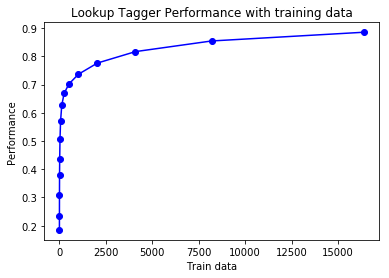

In [77]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(nltk.corpus.brown.tagged_sents())

def display():
    import pylab
    word_freqs = nltk.FreqDist(nltk.corpus.brown.words()).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words())
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with training data')
    pylab.xlabel('Train data')
    pylab.ylabel('Performance')
    pylab.show()

display()


### Question 6 (5-29)
◑ Recall the example of a bigram tagger which encountered a word it hadn't seen during training, and tagged the rest of the sentence as None. It is possible for a bigram tagger to fail part way through a sentence even if it contains no unseen words (even if the sentence was used during training). In what circumstance can this happen? Can you write a program to find some examples of this?

In [95]:
##Yes this can happen since a bigram tagger will depend heavily on the ordering of the words. So while reading in a sentence to a training set, if a sort or set function is used which isn't used in the testing set, we can find instrances where the bigrams in the testing set would find no parallels in the tagger 

bigram_train = list(nltk.bigrams(set(nltk.corpus.brown.sents()[0])))
bigram_test = list(nltk.bigrams(nltk.corpus.brown.sents()[0]))

if list(set(bigram_test)-set(bigram_train)):
    print("Bigram tagger will fail since these set of words aren't encountered by the tagger in training:", list(set(bigram_test)-set(bigram_train)))
else:
    print("All contexts are known")

Bigram tagger will fail since these set of words aren't encountered by the tagger in training: [('place', 'Fulton'), ('election', "Atlanta's"), ('that', 'election'), ('produced', 'The'), ('``', 'County'), ('Grand', '``'), ("Atlanta's", 'Grand'), ('primary', 'took'), ('investigation', 'Jury'), ('an', 'recent'), ('any', 'primary'), ('.', 'evidence'), ('The', 'investigation'), ('County', 'any'), ('Jury', 'of'), ('no', "''"), ('took', 'produced'), ('said', 'place'), ('Fulton', '.'), ("''", 'irregularities'), ('Friday', 'said'), ('evidence', 'that'), ('recent', 'Friday'), ('of', 'no')]



### Question 7 (5-30)
◑ Preprocess the Brown News data by replacing low frequency words with UNK, but leaving the tags untouched. Now train and evaluate a bigram tagger on this data. How much does this help? What is the contribution of the unigram tagger and default tagger now?


In [130]:
tags7 = nltk.corpus.brown.tagged_sents(categories="news")
freq7 = [a[0] for a in nltk.FreqDist(nltk.corpus.brown.words()).most_common(100)]

new = []

for a in tags7:
    new1 = []
    for b in a:
        if b[0] not in freq7:
            new1.append(("UNK", b[1]))
        else:
            new1.append((b[0], b[1]))
    new.append(new1)

size = int(len(new) * 0.9)
train = new[:size]
test = new[size:]

default = nltk.DefaultTagger('NN')
uni = nltk.UnigramTagger(train, backoff=default)
bi = nltk.BigramTagger(train, backoff=uni)

print(default.evaluate(test))
print(uni.evaluate(test))
print(bi.evaluate(test))

0.1262832652247583
0.585467955746038
0.6178610585069272


### Question 8 (5-31)
◑ Modify the program in 4.1 to use a logarithmic scale on the x-axis, by replacing pylab.plot() with pylab.semilogx(). What do you notice about the shape of the resulting plot? Does the gradient tell you anything?

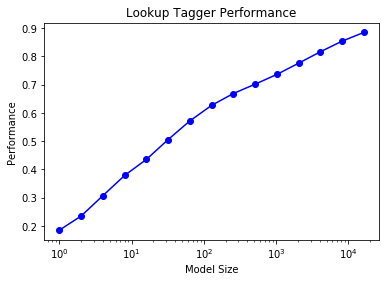

In [106]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(nltk.corpus.brown.tagged_sents())

def display():
    import pylab
    word_freqs = nltk.FreqDist(nltk.corpus.brown.words()).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words())
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.semilogx(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

display()

# Looking at the shape of the plot, we observe that the plot is almost linear in shape, 
# which implies that the model size follows an exponential relationship with the model performance. 
# From the gradient of the graph, the only thing we can tell is that the model size is positively related 
# to the performance of the tagger, i.e. as the model size increases, the tagger performs better

In [131]:
sentences = brown.tagged_sents(categories="news")
freq7 = [a[0] for a in nltk.FreqDist(brown.words()).most_common(500)]

aa = []

for a in sentences:
    aaa = []
    for b in a:
        if b[0] not in freq7:
            aaa.append(("UNK", b[1]))
        else:
            aaa.append((b[0], b[1]))
    aa.append(aaa)

size = int(len(aa) * 0.9)
train = aa[:size]
test = aa[size:]

m1 = nltk.DefaultTagger('NN')
m2 = nltk.UnigramTagger(train, backoff=m1)
m3 = nltk.BigramTagger(train, backoff=m2)

print(m1.evaluate(test), m2.evaluate(test), m3.evaluate(test))

0.1262832652247583 0.6714841024618758 0.7028804943685837
